In [90]:
import pandas as pd

In [91]:
df=pd.read_csv("gender_classification_v7.csv")

In [92]:
df

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
...,...,...,...,...,...,...,...,...
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female


In [93]:
df.head()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female


In [94]:
df.tail()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


In [95]:
df.describe()

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,0.869626,13.181484,5.946311,0.493901,0.507898,0.493101,0.498900
std,0.336748,1.107128,0.541268,0.500013,0.499988,0.500002,0.500049
min,0.000000,11.400000,5.100000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,12.200000,5.500000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,13.100000,5.900000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,14.000000,6.400000,1.000000,1.000000,1.000000,1.000000
max,1.000000,15.500000,7.100000,1.000000,1.000000,1.000000,1.000000


In [96]:
df.columns

Index(['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long', 'gender'],
      dtype='object')

In [97]:
df.isnull().sum()

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [99]:
numerical_cols = df.select_dtypes(include = "number").columns

<Axes: xlabel='long_hair', ylabel='Count'>

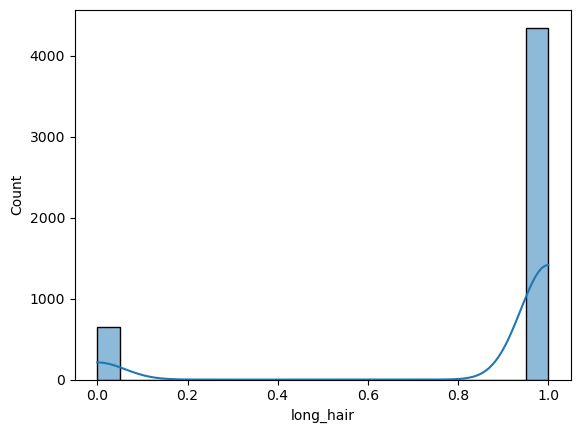

In [100]:
sns.histplot(df["long_hair"],bins=20,kde=True)

<Axes: xlabel='forehead_width_cm', ylabel='Count'>

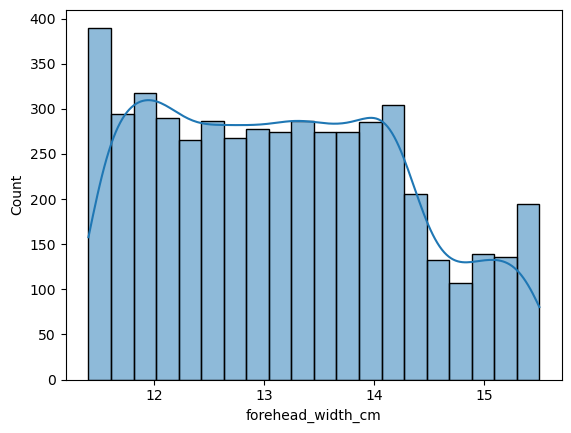

In [101]:
sns.histplot(df["forehead_width_cm"],bins=20,kde=True)

<Axes: xlabel='forehead_height_cm', ylabel='Count'>

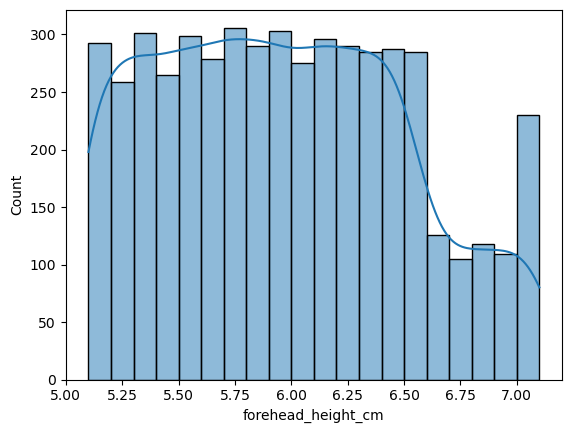

In [102]:
sns.histplot(df['forehead_height_cm'],bins=20,kde=True)

<Axes: xlabel='nose_wide', ylabel='Count'>

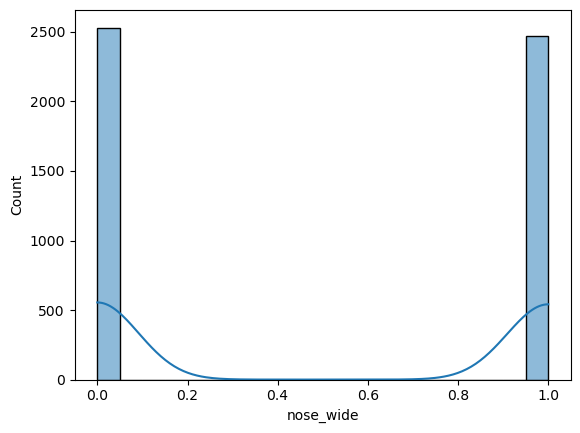

In [103]:
sns.histplot(df["nose_wide"],bins=20,kde=True)

<Axes: xlabel='nose_long', ylabel='Count'>

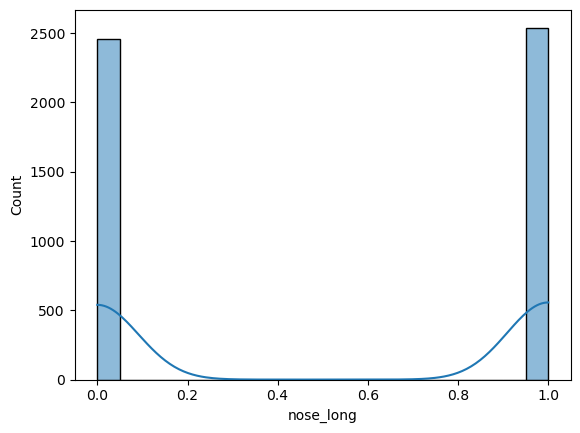

In [104]:
sns.histplot(df["nose_long"],bins=20,kde=True)

<Axes: xlabel='lips_thin', ylabel='Count'>

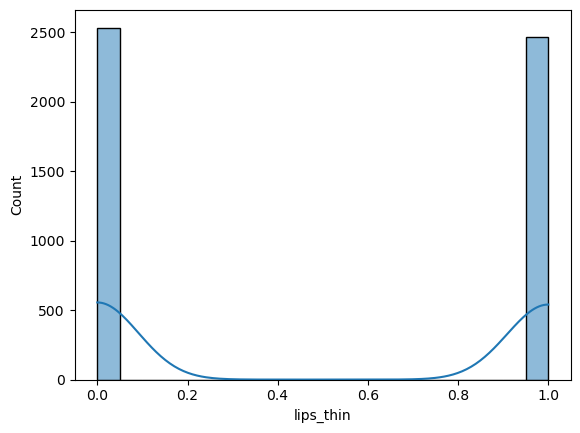

In [105]:
sns.histplot(df["lips_thin"],bins=20,kde=True)

<Axes: xlabel='distance_nose_to_lip_long', ylabel='Count'>

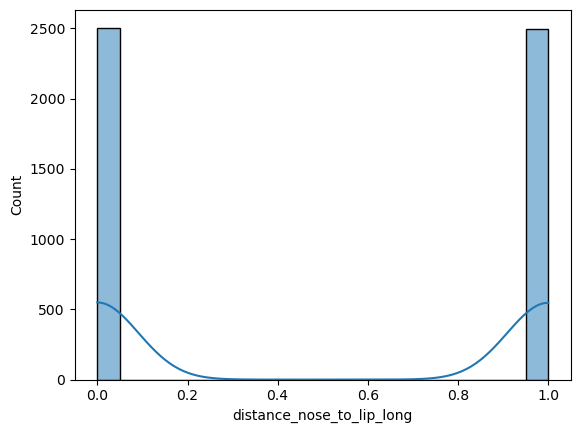

In [106]:
sns.histplot(df["distance_nose_to_lip_long"],bins=20,kde=True)

In [117]:
columns=['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide',
       'nose_long', 'lips_thin', 'distance_nose_to_lip_long',]
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    LOWER_BOUND=Q1-1.5*IQR
    UPPER_BOUND=Q3+1.5*IQR
    outliers=df[(df[col]<LOWER_BOUND) | (df[col]>UPPER_BOUND)]
    print(outliers.shape[0])

0
0
0
0
0
0
0


In [118]:
for col in columns:
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1

    LOWER_BOUND=Q1-1.5*IQR
    UPPER_BOUND=Q3+1.5*IQR
    outliers=df[(df[col]<LOWER_BOUND) |(df[col]>UPPER_BOUND)]
    df[col]=df[col].clip(lower=LOWER_BOUND,upper=UPPER_BOUND)


<Figure size 1200x1400 with 0 Axes>

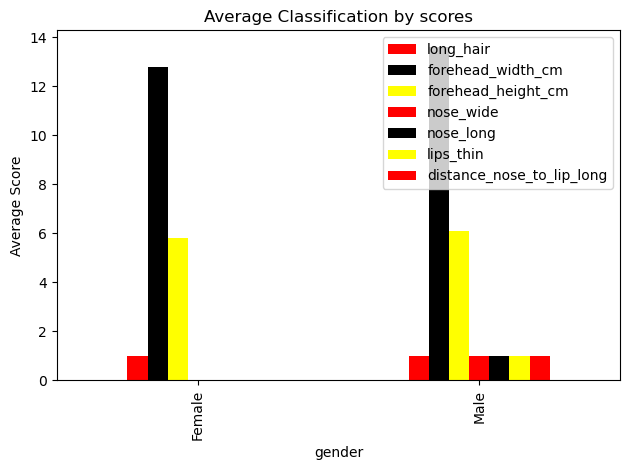

In [120]:
colours=['Red','Black','yellow']
plt.figure(figsize = (12,14))
avg_classification_by_gender = df.groupby("gender")[['long_hair', 'forehead_width_cm', 'forehead_height_cm', 'nose_wide','nose_long', 'lips_thin', 'distance_nose_to_lip_long']].median().reset_index()
avg_classification_by_gender.set_index("gender").plot(kind="bar",color=colours)
plt.title("Average Classification by scores")
plt.ylabel("Average Score")
plt.tight_layout()
plt.show()
           
           

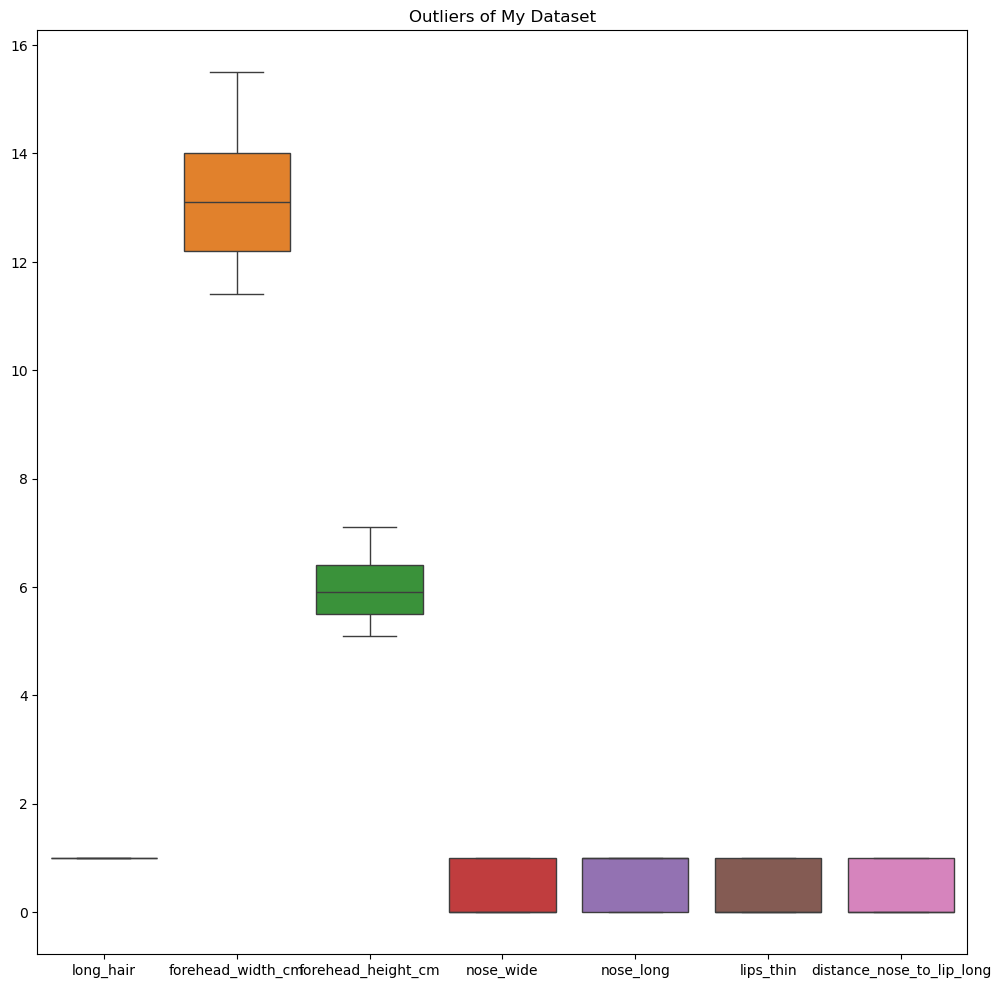

In [130]:
plt.figure(figsize=(12,12))
sns.boxplot(data=df)
plt.title("Outliers of My Dataset")
plt.show()

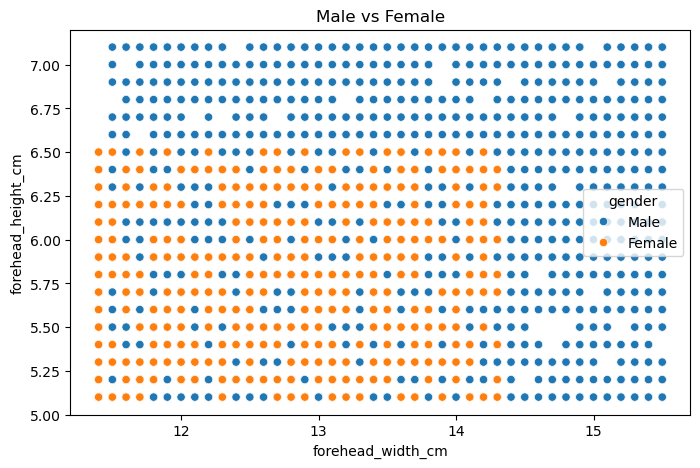

In [127]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,x='forehead_width_cm',y='forehead_height_cm',hue='gender')
plt.title("Male vs Female")
plt.show()